In [1]:
!pip install -U mistune


  Using cached mistune-2.0.4-py2.py3-none-any.whl (24 kB)
  Attempting uninstall: mistune
    Found existing installation: mistune 0.8.4
    Uninstalling mistune-0.8.4:
      Successfully uninstalled mistune-0.8.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbconvert 6.4.4 requires mistune<2,>=0.8.1, but you have mistune 2.0.4 which is incompatible.


# Part I - (Prosper Loan Analysis)
## by (Akua Amankwa Otchere)

## Introduction


This dataset is financial dataset and this is related to the loan, borrowers, lenders, interest rates and stuffs like that. Prosper or [Prosper Marketplace Inc](https://www.prosper.com/). is a San Francisco, California based company specializing in loans at low interest rates to the borrowers. 


This data set contains 113,937 loan records with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set.

 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

pd. set_option("display.max_rows", None) 
pd.set_option("display.max_rows", None)

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#looking at the top 5 rows of the dataset 
data = pd.read_csv('prosperLoanData.csv')
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#looking at the number of rows and columns in the data
data.shape

(113937, 81)

There are 113937 rows and 81 columns in the data

In [4]:
#looking at the features in the data 
data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
#selecting most relevant features for analysis 
df = data[['LoanKey', 'LoanOriginationDate','Term','LoanStatus', 'ClosedDate','BorrowerAPR','BorrowerRate','ProsperScore', 
               'ListingCategory (numeric)', 'BorrowerState', 'Occupation','EmploymentStatus','IsBorrowerHomeowner', 
                'LoanOriginalAmount', 'TotalProsperLoans', 'EstimatedEffectiveYield','CreditScoreRangeLower',
           'CreditScoreRangeUpper',
               'DebtToIncomeRatio','IncomeRange', 'TotalProsperPaymentsBilled','OnTimeProsperPayments',
               'LoanCurrentDaysDelinquent','Investors','StatedMonthlyIncome','MonthlyLoanPayment',
               'IncomeVerifiable']]

In [6]:
#looking at the first 5 rows of the selected columns
df.head()

,LoanKey,LoanOriginationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),BorrowerState,...,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,TotalProsperPaymentsBilled,OnTimeProsperPayments,LoanCurrentDaysDelinquent,Investors,StatedMonthlyIncome,MonthlyLoanPayment,IncomeVerifiable
0,E33A3400205839220442E84,2007-09-12 00:00:00,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,NaN,0,CO,...,659.0,0.17,"$25,000-49,999",NaN,NaN,0,258,3083.333333,330.43,True
1,9E3B37071505919926B1D82,2014-03-03 00:00:00,36,Current,NaN,0.12016,0.0920,7.0,2,CO,...,699.0,0.18,"$50,000-74,999",NaN,NaN,0,1,6125.000000,318.93,True
2,6954337960046817851BCB2,2007-01-17 00:00:00,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,NaN,0,GA,...,499.0,0.06,Not displayed,NaN,NaN,0,41,2083.333333,123.32,True
3,A0393664465886295619C51,2012-11-01 00:00:00,36,Current,NaN,0.12528,0.0974,9.0,16,GA,...,819.0,0.15,"$25,000-49,999",NaN,NaN,0,158,2875.000000,321.45,True
4,A180369302188889200689E,2013-09-20 00:00:00,36,Current,NaN,0.24614,0.2085,4.0,2,MN,...,699.0,0.26,"$100,000+",11.0,11.0,0,20,9583.333333,563.97,True


In [7]:
#consise summary of the newly created data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   LoanKey                     113937 non-null  object 
 1   LoanOriginationDate         113937 non-null  object 
 2   Term                        113937 non-null  int64  
 3   LoanStatus                  113937 non-null  object 
 4   ClosedDate                  55089 non-null   object 
 5   BorrowerAPR                 113912 non-null  float64
 6   BorrowerRate                113937 non-null  float64
 7   ProsperScore                84853 non-null   float64
 8   ListingCategory (numeric)   113937 non-null  int64  
 9   BorrowerState               108422 non-null  object 
 10  Occupation                  110349 non-null  object 
 11  EmploymentStatus            111682 non-null  object 
 12  IsBorrowerHomeowner         113937 non-null  bool   
 13  LoanOriginalAm

In [8]:
#checking for null values 
df.isna().sum()

LoanKey                           0
LoanOriginationDate               0
Term                              0
LoanStatus                        0
ClosedDate                    58848
BorrowerAPR                      25
BorrowerRate                      0
ProsperScore                  29084
ListingCategory (numeric)         0
BorrowerState                  5515
Occupation                     3588
EmploymentStatus               2255
IsBorrowerHomeowner               0
LoanOriginalAmount                0
TotalProsperLoans             91852
EstimatedEffectiveYield       29084
CreditScoreRangeLower           591
CreditScoreRangeUpper           591
DebtToIncomeRatio              8554
IncomeRange                       0
TotalProsperPaymentsBilled    91852
OnTimeProsperPayments         91852
LoanCurrentDaysDelinquent         0
Investors                         0
StatedMonthlyIncome               0
MonthlyLoanPayment                0
IncomeVerifiable                  0
dtype: int64

In [9]:
#descriptive statistics of the newly created data
df.describe()

,Term,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),LoanOriginalAmount,TotalProsperLoans,EstimatedEffectiveYield,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,TotalProsperPaymentsBilled,OnTimeProsperPayments,LoanCurrentDaysDelinquent,Investors,StatedMonthlyIncome,MonthlyLoanPayment
count,113937.000000,113912.000000,113937.000000,84853.000000,113937.000000,113937.00000,22085.000000,84853.000000,113346.000000,113346.000000,105383.000000,22085.000000,22085.000000,113937.000000,113937.000000,1.139370e+05,113937.000000
mean,40.830248,0.218828,0.192764,5.950067,2.774209,8337.01385,1.421100,0.168661,685.567731,704.567731,0.275947,22.934345,22.271949,152.816539,80.475228,5.608026e+03,272.475783
std,10.436212,0.080364,0.074818,2.376501,3.996797,6245.80058,0.764042,0.068467,66.458275,66.458275,0.551759,19.249584,18.830425,466.320254,103.239020,7.478497e+03,192.697812
min,12.000000,0.006530,0.000000,1.000000,0.000000,1000.00000,0.000000,-0.182700,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000
25%,36.000000,0.156290,0.134000,4.000000,1.000000,4000.00000,1.000000,0.115670,660.000000,679.000000,0.140000,9.000000,9.000000,0.000000,2.000000,3.200333e+03,131.620000
50%,36.000000,0.209760,0.184000,6.000000,1.000000,6500.00000,1.000000,0.161500,680.000000,699.000000,0.220000,16.000000,15.000000,0.000000,44.000000,4.666667e+03,217.740000
75%,36.000000,0.283810,0.250000,8.000000,3.000000,12000.00000,2.000000,0.224300,720.000000,739.000000,0.320000,33.000000,32.000000,0.000000,115.000000,6.825000e+03,371.580000
max,60.000000,0.512290,0.497500,11.000000,20.000000,35000.00000,8.000000,0.319900,880.000000,899.000000,10.010000,141.000000,141.000000,2704.000000,1189.000000,1.750003e+06,2251.510000


In [10]:
#getting only the categorical variables 
cat=df.select_dtypes(include='object')
cat.head()

,LoanKey,LoanOriginationDate,LoanStatus,ClosedDate,BorrowerState,Occupation,EmploymentStatus,IncomeRange
0,E33A3400205839220442E84,2007-09-12 00:00:00,Completed,2009-08-14 00:00:00,CO,Other,Self-employed,"$25,000-49,999"
1,9E3B37071505919926B1D82,2014-03-03 00:00:00,Current,NaN,CO,Professional,Employed,"$50,000-74,999"
2,6954337960046817851BCB2,2007-01-17 00:00:00,Completed,2009-12-17 00:00:00,GA,Other,Not available,Not displayed
3,A0393664465886295619C51,2012-11-01 00:00:00,Current,NaN,GA,Skilled Labor,Employed,"$25,000-49,999"
4,A180369302188889200689E,2013-09-20 00:00:00,Current,NaN,MN,Executive,Employed,"$100,000+"


In [11]:
#descriptive statistics of the categorical variables 
df.describe(include=object)

,LoanKey,LoanOriginationDate,LoanStatus,ClosedDate,BorrowerState,Occupation,EmploymentStatus,IncomeRange
count,113937,113937,113937,55089,108422,110349,111682,113937
unique,113066,1873,12,2802,51,67,8,8
top,CB1B37030986463208432A1,2014-01-22 00:00:00,Current,2014-03-04 00:00:00,CA,Other,Employed,"$25,000-49,999"
freq,6,491,56576,105,14717,28617,67322,32192


### What is the structure of your dataset?

> The datasets contains 113937 records and 81 columns. 50 float variables, 3 booleans, 11 integers, 16 categorical and 1 date column. The most important features will be selected from the lot.

### What is/are the main feature(s) of interest in your dataset?

- I am interested in finding the features that influences the Loan Amount, and features that will have relationship with applicants loan status. How are these features correlated with each other
 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features such as **Loan Original Amount, Credit Score, Loan Term, Occupation, ProsperScore, Employment Status, Loan Current Day Dilliquent, On-Time Prosper Payments, Borrower Rate, Investors** and **Stated Monthly Income** will be the major factors to determine whether a person will be given a loan or not

## Univariate Exploration

In [12]:
#converting the date column to the correct data type 
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])
#extracting year from the date column
df['Year'] = df['LoanOriginationDate'].dt.year

#getting the credit score by taking the average of the upper and the lower credit scores 
df['CreditScore']=(df['CreditScoreRangeLower']+df['CreditScoreRangeUpper'])/2

df["LoanStatus"]=data["LoanStatus"].replace({"Past Due (1-15 days)":"Other", "Past Due (31-60 days)":"Other", 
                     "Past Due (61-90 days)":"Other", "Past Due (91-120 days)":"Other",
                                        "Past Due (16-30 days)":"Other", "Past Due (>120 days)":"Other", 
                                            "Current":"Other", "Chargedoff":"Other", 
                                             "FinalPaymentInProgress":"Other", "Cancelled":"Other"})

#grouping applicants employment status
df["EmploymentStatus"]=data["EmploymentStatus"].replace({"Not available":"Other"})

#grouping applicants occupationd
df["Occupation"]=data["Occupation"].replace({"Student - Technical School":"Student", "Student - Community College":"Student", 
                     "Student - College Freshman":"Student", "Student - College Sophomore":"Student",
                                        "Student - College Junior":"Student", "Student - College Senior":"Sudent", 
                                           "Student - College Graduate Student":"Student" })

- During the data exploration, I discovered a wide range of outliers in the data, I cleared the outliers by seting a cut off point for thses variables. 

- Categorical variables such as Loan Status, Employment Status and Occupation were grouped to format that reduce redundancy and to aid in the the data analysis. Also the date column, which was supposed to be a datetiem column was an object data type. This was also converted to the right format with pandas to_datetime function. 

In [13]:
#selecting only numerical variables 
num=df.select_dtypes(include=np.number)
num.columns

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'ProsperScore',
       'ListingCategory (numeric)', 'LoanOriginalAmount', 'TotalProsperLoans',
       'EstimatedEffectiveYield', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'DebtToIncomeRatio',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'LoanCurrentDaysDelinquent', 'Investors', 'StatedMonthlyIncome',
       'MonthlyLoanPayment', 'Year', 'CreditScore'],
      dtype='object')

**What is the trend of loan overtime? I will use a line chart to visualize the trend of loan over the years.** 

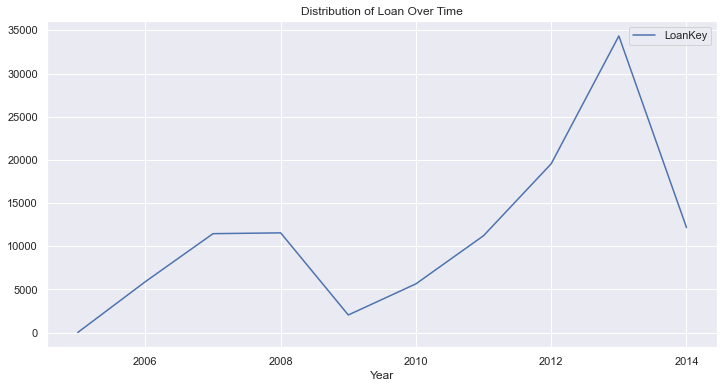

In [14]:
#looking at the trend of loans granted over the years 
df.groupby('Year')[['LoanKey']].count().plot(figsize=[12,6]).set_title('Distribution of Loan Over Time');

Number of loans increased from 2005 to 2007, After 2008, the number of loans decreased, although it later resumed increasing exponentially. The line declines once more in 2014. This is due to the fact that the data did not cover the entire year.

**What is the distributions of the numerical variables? I will create a for loop to explore the distribution of the numerical ariables**

<Figure size 432x288 with 0 Axes>

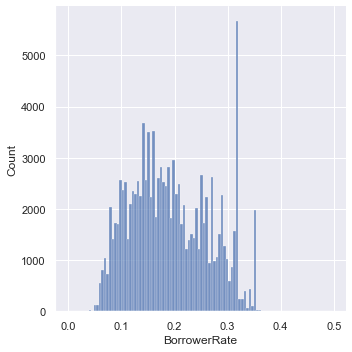

<Figure size 432x288 with 0 Axes>

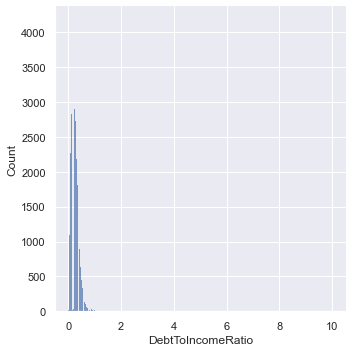

<Figure size 432x288 with 0 Axes>

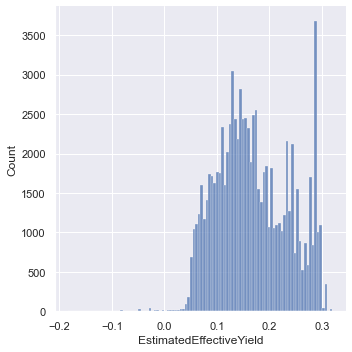

<Figure size 432x288 with 0 Axes>

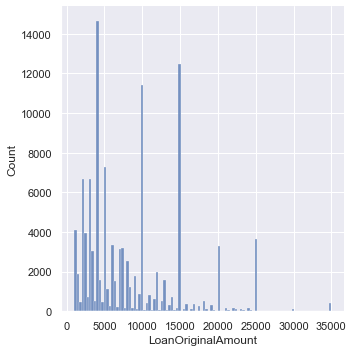

<Figure size 432x288 with 0 Axes>

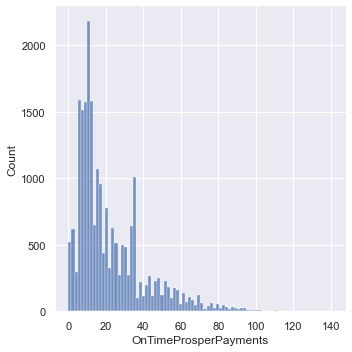

<Figure size 432x288 with 0 Axes>

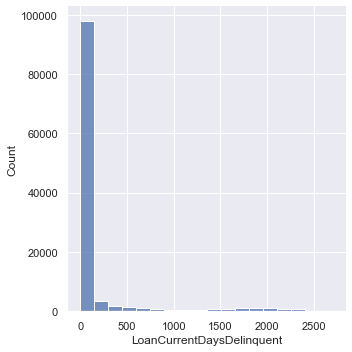

<Figure size 432x288 with 0 Axes>

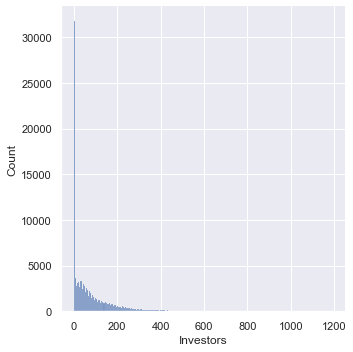

<Figure size 432x288 with 0 Axes>

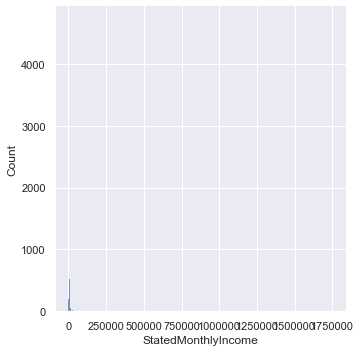

<Figure size 432x288 with 0 Axes>

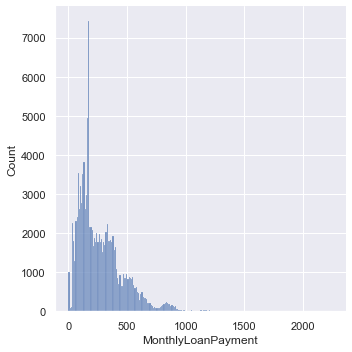

In [15]:
#plotting a distribution plot for the quantitative variables 
numerical=df[[ 'BorrowerRate','DebtToIncomeRatio', 'EstimatedEffectiveYield','LoanOriginalAmount',
       'OnTimeProsperPayments', 'LoanCurrentDaysDelinquent', 'Investors', 'StatedMonthlyIncome',
       'MonthlyLoanPayment']]
for col in numerical:
    plt.figure()
    
    sns.displot(df[col])
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()
    df[col].describe()


In [16]:
#taking off outliers from the features
df= df.drop(df[(df["DebtToIncomeRatio"]>1) | (df["OnTimeProsperPayments"]>100)\
            | (df["Investors"]>300)|(df["StatedMonthlyIncome"]>20000) | (df["MonthlyLoanPayment"]>1000)].index)


<Figure size 432x288 with 0 Axes>

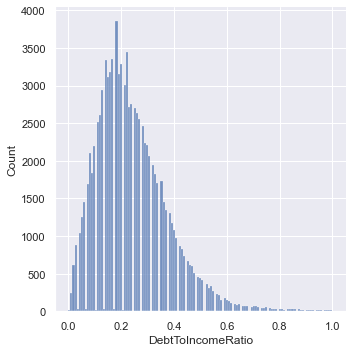

<Figure size 432x288 with 0 Axes>

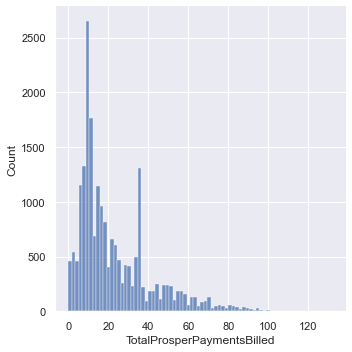

<Figure size 432x288 with 0 Axes>

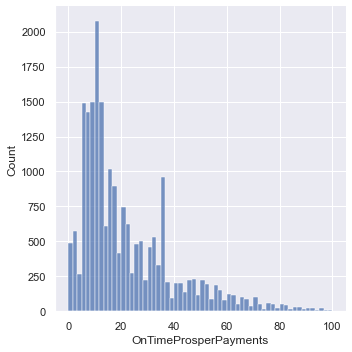

<Figure size 432x288 with 0 Axes>

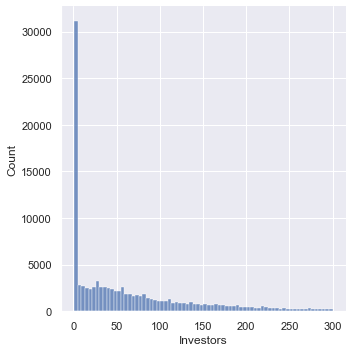

<Figure size 432x288 with 0 Axes>

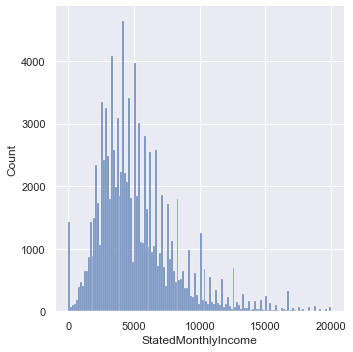

<Figure size 432x288 with 0 Axes>

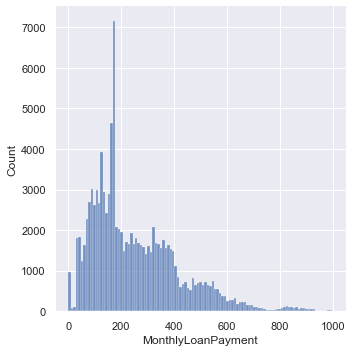

<Figure size 432x288 with 0 Axes>

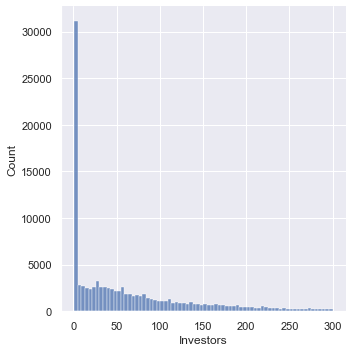

In [17]:
#checking if the changes has been effected 

check=df[['DebtToIncomeRatio', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'Investors', 'StatedMonthlyIncome',
       'MonthlyLoanPayment', 'Investors']]
for i in check:
    plt.figure()
    sns.displot(df[i])
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()

There are outliers in all the variables except Borrower APR and Borrower Rate. These extreme values will be trimmed off to a margianble extent. 
- Borrower rate has a normaly distributed shape with Most of the applicaants centered around a borrower rate between 5% and 35%.
- From further reasearch on Prosper Loans, Debth-to-Income ratio must not surpass 50%. Majority of the applicants has a DTI between 0 and 40%. Most of the on-time payments borrowers makes payent between the ranges of 5 and 20.
- EstimatedEffectiveYield seems to be multimodal. The most popular EstimatedEffectiveYield is around 0.3
- Mean loan amount is 8338 dollars, and the median is 6500 dollars. Prosper makes mostly small loans. Loans are capped at 35000 dollars, but even so, the distribution is skewed to the right. There are spikes at multiples of 5000, which are common loan amounts. The minimum loan is set at 1000 dollars
- Almost all loan delinquent is centered around 0 and 100 with very few of them exceeding 100. The maximum Loan Delinquent is 2600
- Most of the times, there are no investors funding the loans
- Monthly loan payment is skewed to the right, majority of the loan payments are between 0 and 200. There are a few payments that exceeds 1000

Now the outliers has been dealt with

In [18]:
#exploring the other numerical variables 
def explore_us(data, x):
    
    """This functions takes in two arguments (from the numerical variables), 
    the data and the column and plots the value counts
    
    """
    data[x].value_counts().plot.bar()
    plt.title('Distribution of {}'.format(x))

**What are the Loan Terms of Applicants?**

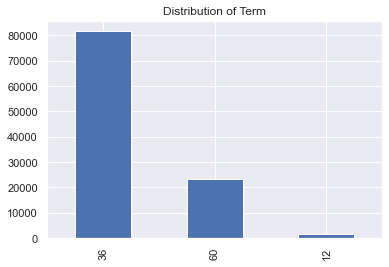

In [19]:
#distribution of loan terms for applicants 
explore_us(df, 'Term')


In terms of terms of loan, about 70% of the applicants has a 36 month term (3 years) with minority of the applicants with 12 months term (1 year)

**distribution of Total prosper loans**

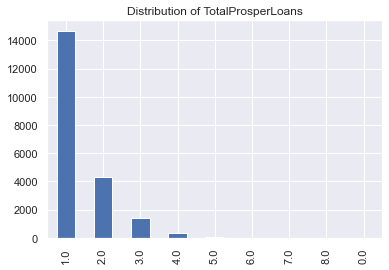

In [20]:

explore_us(df, 'TotalProsperLoans')

Majority of the applicants  have applied for Prosper loans on only 1 occassion. Insignificant number of people have applied more than 5 times

#### Exploring the Categorical Variables 

In [21]:
#selecting only categorical variables 
cat=df.select_dtypes(include=object)
cat.columns

Index(['LoanKey', 'LoanStatus', 'ClosedDate', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'IncomeRange'],
      dtype='object')

**What are the Employment Status of the loan applicants?**

In [22]:
#getting the total number of records in the dataset to be able to assign percentages to the groups in the features
total = float(len(df))

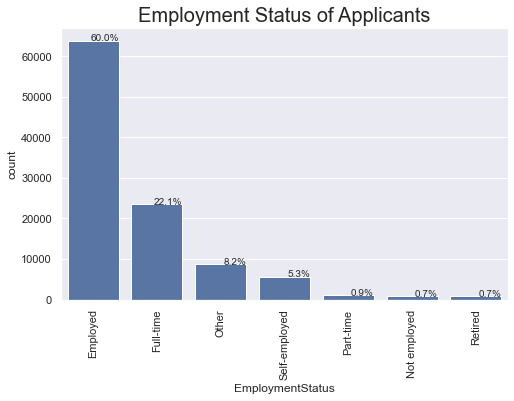

In [23]:
#looking at the frequencies of employment status of applicants 
plt.figure(figsize=(8,5))
order=df['EmploymentStatus'].value_counts().index
ax = sns.countplot(x="EmploymentStatus", data=df, order=order, color = sns.color_palette()[0])
plt.title('Employment Status of Applicants', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(rotation=90)
plt.show()

Majority of the applicants (60%) are employed with 19% of them being full time employers. Retired and unemployed applicants are the least among them (6% each)

**What are the Loan Status of the Applicants?**

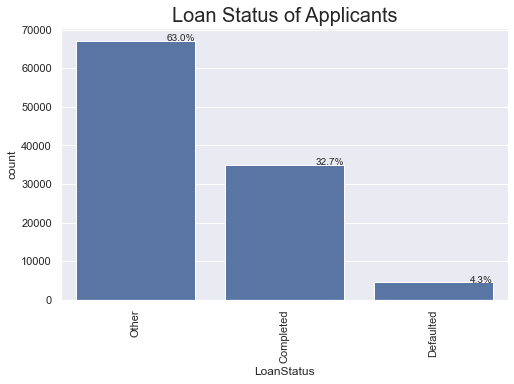

In [24]:
#looking at the frequency of loan status of applicants 

plt.figure(figsize=(8,5))
order=df['LoanStatus'].value_counts().index
ax = sns.countplot(x="LoanStatus", data=df, order=order, color = sns.color_palette()[0])
plt.title('Loan Status of Applicants', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(rotation=90)
plt.show()

About 33% of the applicants have a Completed loan status with very few of them defaulted. A whoping 62% has either a past due loan staus or any other form aside completed or default.

**Plotting a bar chart to know which state the applicants are coming from**

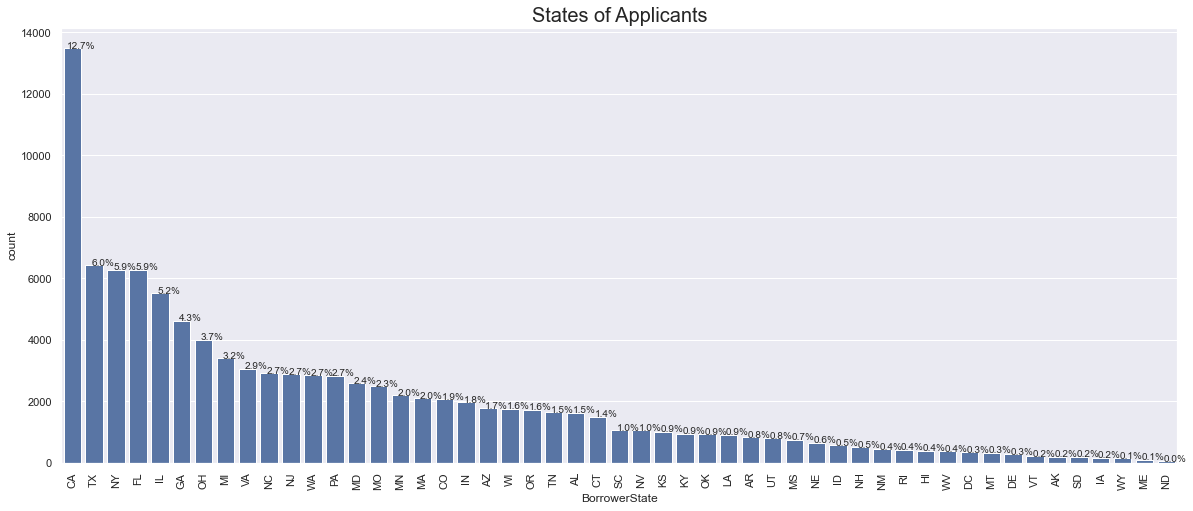

In [25]:
#looking at the frequency of States of applicants 

plt.figure(figsize=(20,8))
order=df['BorrowerState'].value_counts().index
ax = sns.countplot(x="BorrowerState", data=df, order=order, color = sns.color_palette()[0])
plt.title('States of Applicants', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    plt.xticks(rotation=90)
plt.show()

Majority of the applicants (13%) are from California, then followed by Texas, New York and Florida (6% each).


**Occupation of Loan Applicants**

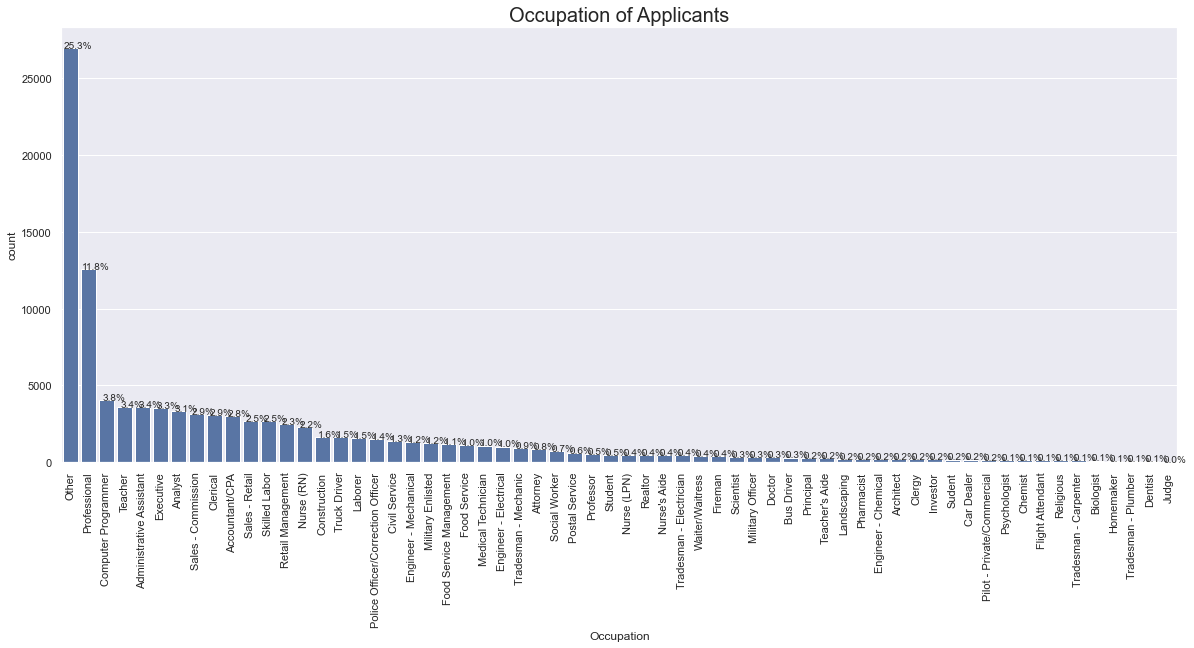

In [26]:
#looking at the frequency of occupation of applicants 

plt.figure(figsize=(20,8))
order=df['Occupation'].value_counts().index
ax = sns.countplot(x="Occupation", data=df, order=order, color = sns.color_palette()[0])
plt.title('Occupation of Applicants', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    plt.xticks(rotation=90)
plt.show()

Grouping the occupations of the applicants, Most of them are professionals (12%), Applicants with 'other' job title makes up to 25%

**What are the Income Range of Loan Applicnts**

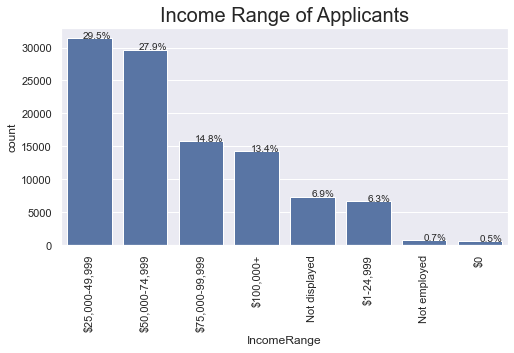

In [27]:
#looking at the frequency of income range of applicants 

plt.figure(figsize=(8,4))
order=df['IncomeRange'].value_counts().index
ax = sns.countplot(x="IncomeRange", data=df, order=order, color = sns.color_palette()[0])
plt.title('Income Range of Applicants', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(rotation=90)
plt.show()


Majority of the applicants (28%) has an annual income range between 25000 dollars and 50000 dollars. They are closely followed by appliacnts with an income range between 50000 dollars and 75000 dollars.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


During the initial explortaion, I added three new variables to be able to get the bettwe of the analysis. Year (the year the loan was originated), CreditScore (the average of the upper and lower credit scores), and grouping redundant variables. Prosper has increased every year since it began, with the exception of 2008, when there was a decline. Borrowers' median salary is $56,000, and they typically take out $6500 loans with terms of three years. The median credit score was 689.5, however minimum credit scores of 600 and 640, respectively, were implemented in 2009 and 2014, so the median credit score may increase in the future.

There are some transformations to make. There were outliers in some of the features and also I engineered some of the features to get a better grouping of the features 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - In exploring the variables, I first explored the quantitaivevariables of interest. I detected outliers in most of the features, with further research on the debt to income ratio and credit score I discovered that, **To qualify for a Prosper personal loan, borrowers need an annual income greater than $0, a debt-to-income (DTI) ratio that's 50% or below, and a credit score that's at least 640**. With this info, I stripped off all DTI values that are greater than 1. 
- There was extreme inignificant values in the Total Prosper PaymentsBilled, On-Time Prosper Payments, Investors, Monthly Income', and Monthly LoanPayment columns. These values were too high and too small and insignificant which made the distributions rightly skewed. The extreme values were taken off. 
- The loan status column was grouped into various categories. All groups that have number of days in parenthesis and Past Due attached were all grouped into 1 category as Past Due.  Also for the occupations column, all categories with students attached were all grouped as students. For the employment status, all Not Available columns were considered as other. 



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

**What is the relationship between the numerical variables? I wll use a heatmap and the scatter plot to find the correlation**

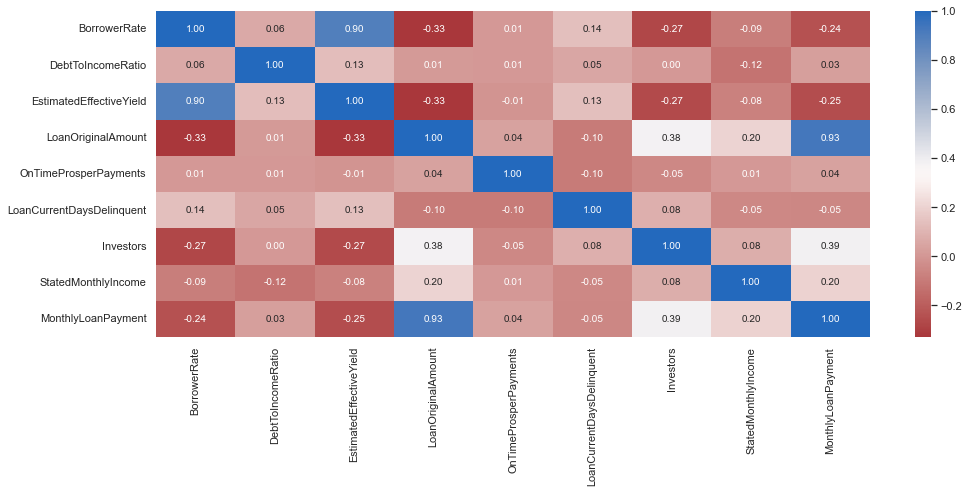

In [28]:
#heatmap to check the correlation between numerical variables 
plt.figure(figsize = [16, 6])
sns.heatmap(numerical.corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r');

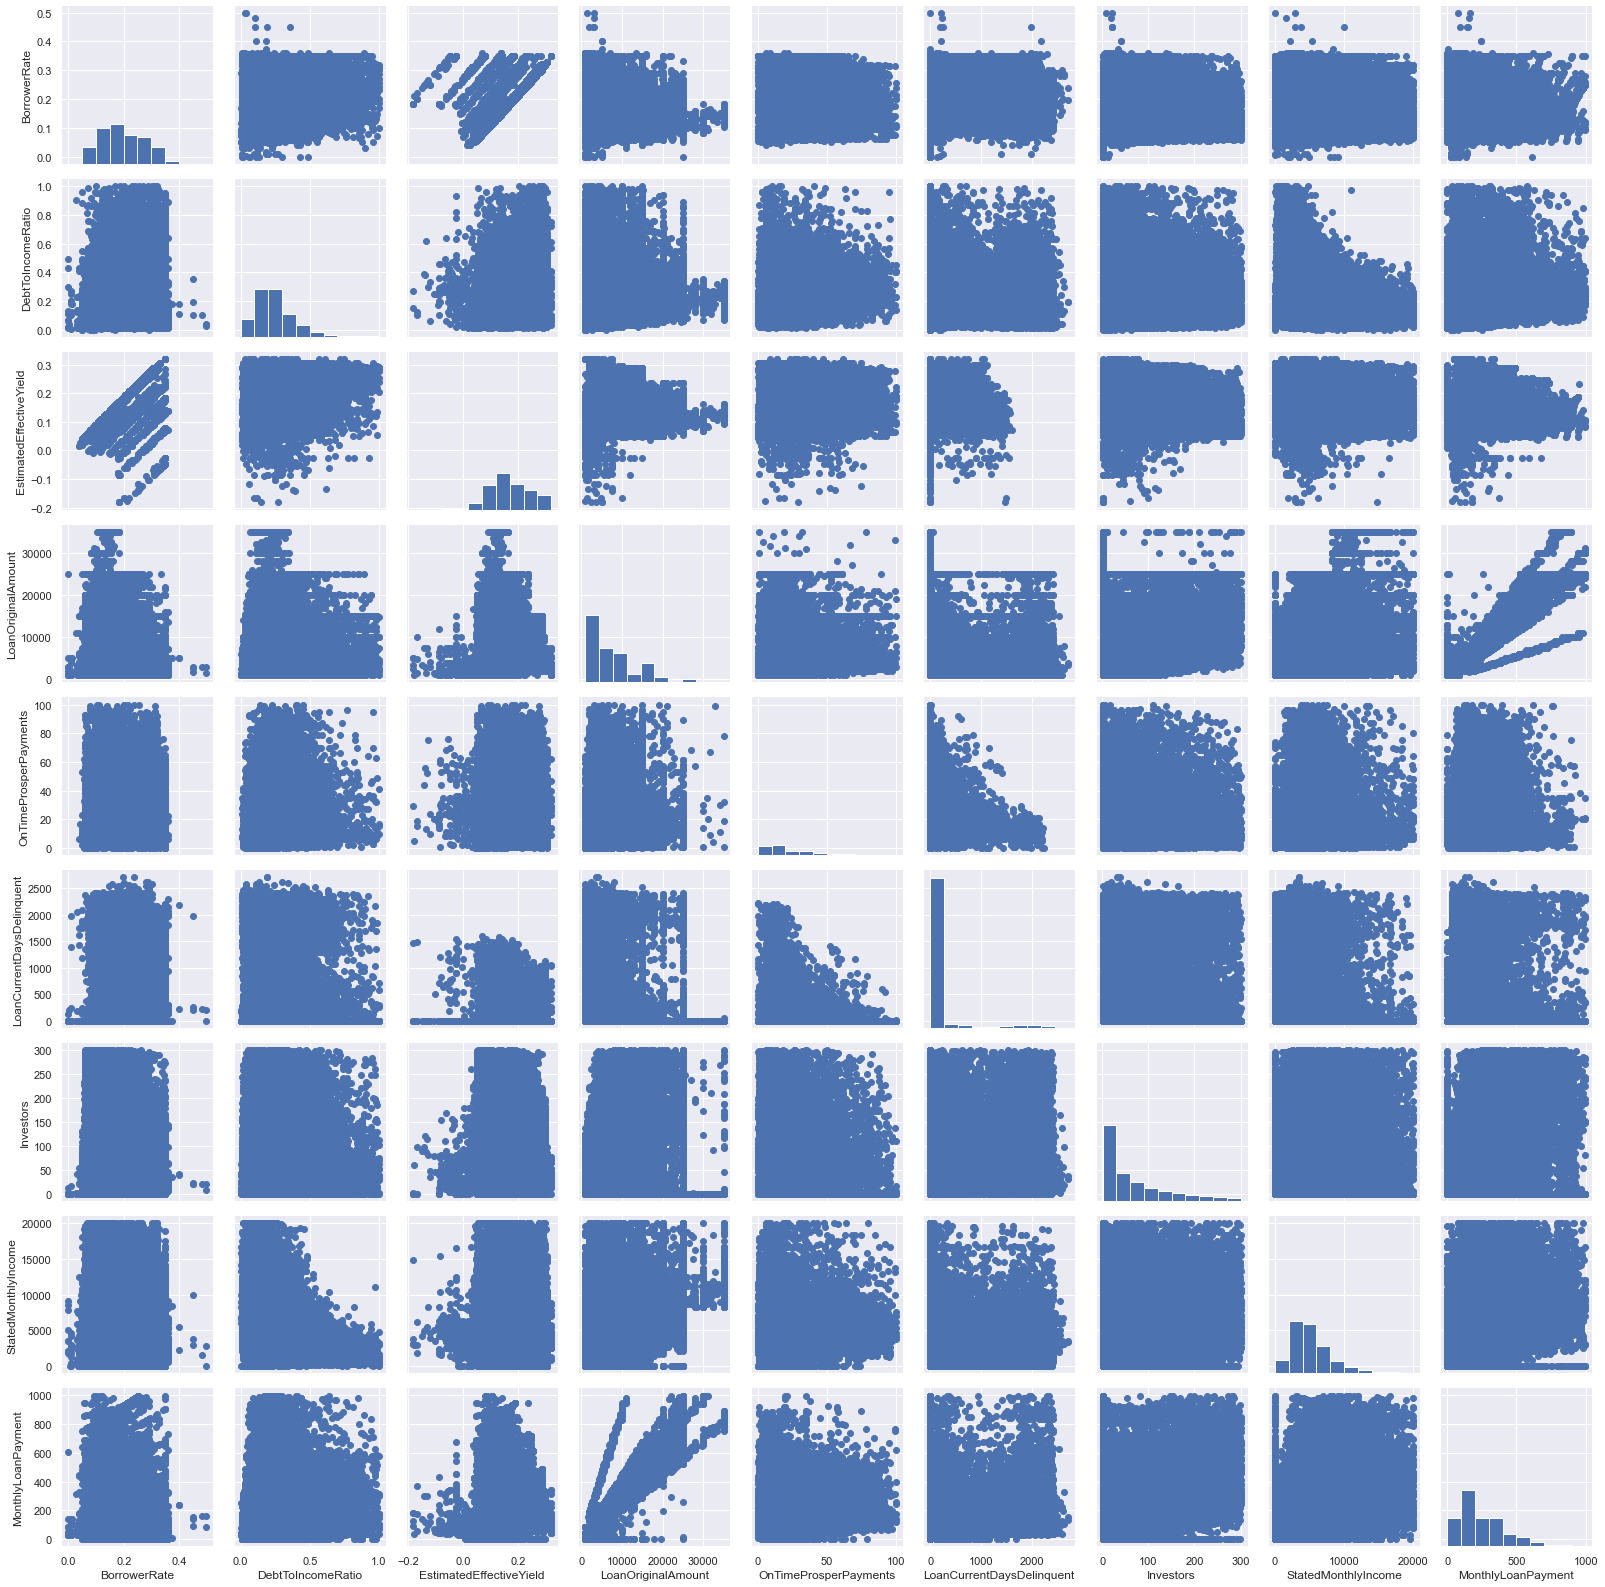

In [29]:
#checking for the relationship between numerical variables with the scatter plot 
g = sns.PairGrid(df, vars=numerical)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);
plt.show()

There is a very strong positive relationship between Estimated Effective Yield and  Borrower Rate, Loan original Amount and Loan monthly payment, Also there is sligh positive relationship between investors and loan amount, and Investors and monthly loan paymen for the other pairs of numerical variables, there is no correlation

**Exploring the relationship between qualitative and quantitative variables** 

In [30]:
#writing a function to visualize the realtionship between qualitative and quantitative variables
def compare_qual_quan(data, x, y):
    
    """ This functions plots a box plot to visualize how a qualitative 
     variable relates with a quantitative variable
    """
    plt.figure(figsize=[16,6])
    plt.title('Relationship Between {} and {} '.format(x, y))
    sns.boxenplot(data[x], data[y])
    plt.xticks(rotation=90)
    

**What is the relationship between credit score and Laon amount**

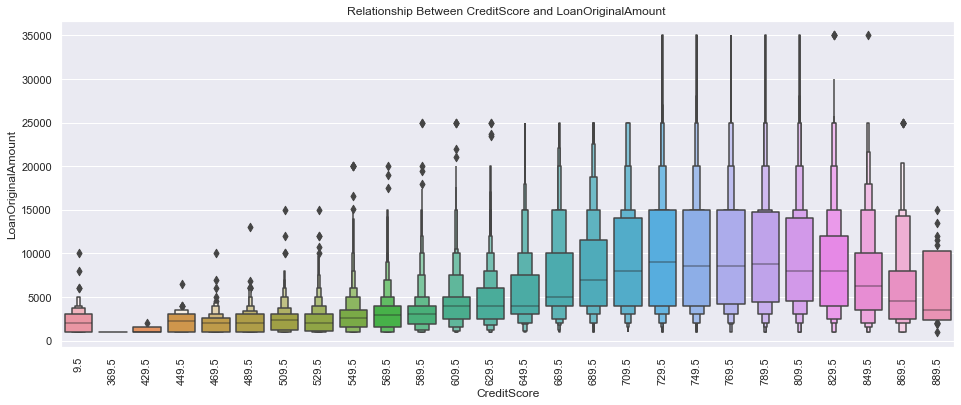

In [31]:
#relationship between Loan status of applicants and Debt to income ratio
compare_qual_quan(df, 'CreditScore', 'LoanOriginalAmount')

There is a positive relationship between Credit Score and Loan Amount. the better the credit score, the higher the loan amount. However, loan amount amount starts to decrese after credit score of 800.

**What is the relationship between Loan term of applicants and On-Time Prosper Payments**


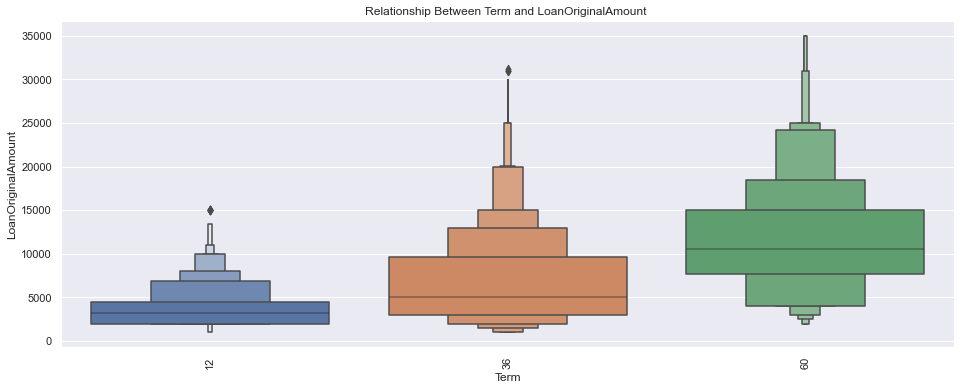

In [32]:

compare_qual_quan(df, 'Term', 'LoanOriginalAmount')

Loan term and loan amount have a positive relationship. Applicants with 36 months (5 years) term tends to receive a higher loan amount than the other applicants. The 75th percentile of loan amounts for loans of one year is really much lower than the 25th percentile for loans of five years. This may indicate that Prosper's 1-year loans are frequently used for less expensive, impulsive purchases.

**What is the relationship between Applicants prosper score and Estimated Effective Yield**

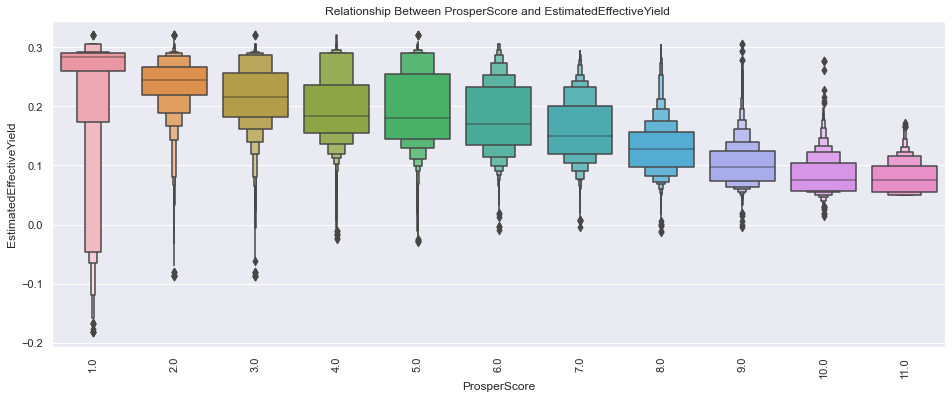

In [33]:
compare_qual_quan(df, 'ProsperScore', 'EstimatedEffectiveYield')

 For a lower ProsperScore, distribution of effective yield is higher than the higher ProsperScores. Median (represented by the black dot) of  decreases as ProsperScore increases 


**How is Prosper Score Related to Loan Amount**

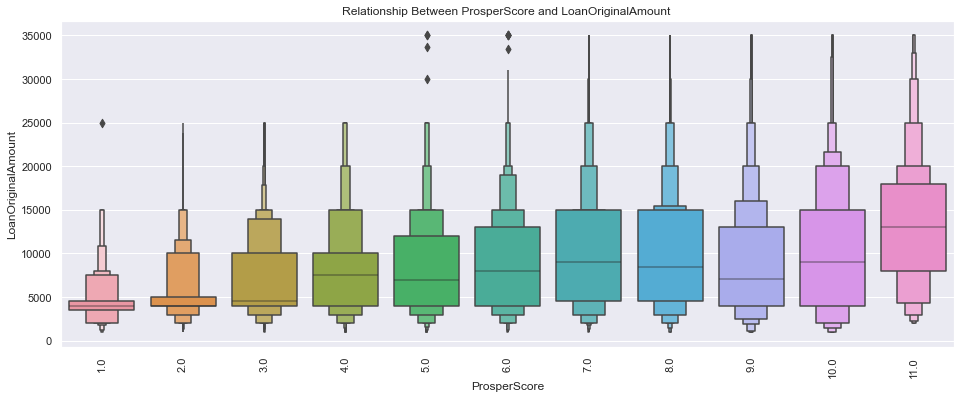

In [34]:
compare_qual_quan(df, 'ProsperScore', 'LoanOriginalAmount')

Prosper score is highly correlated with loan amount. The higher the prosper score, the higher the loan amount.

**What have been the tend of Loan Amount over the years**

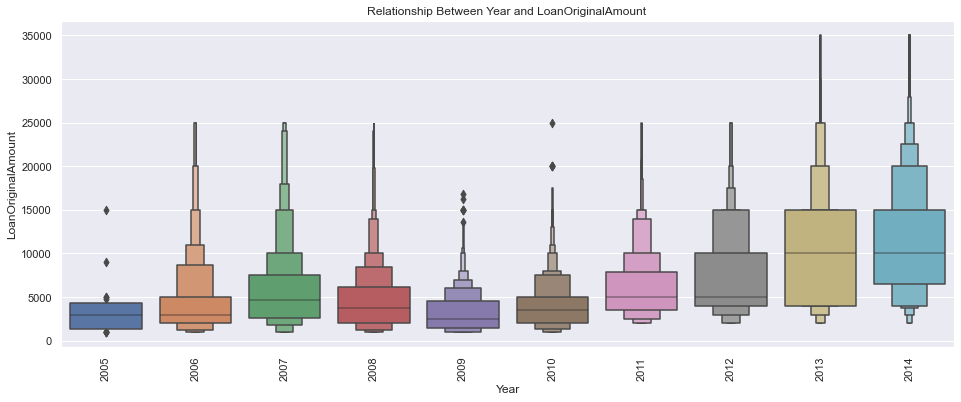

In [35]:
#relationship between employment status of applicants and debt to income ratio

compare_qual_quan(df, 'Year', 'LoanOriginalAmount')

loan amount has been increasing over time. From the graph, It appears that a new minimum loan amount was implemented in 2011 and that the maximum loan amount was increased in 2013 from 25,000 to 35,000 dollars.

**How is Employment Status correlated with Loan Status**

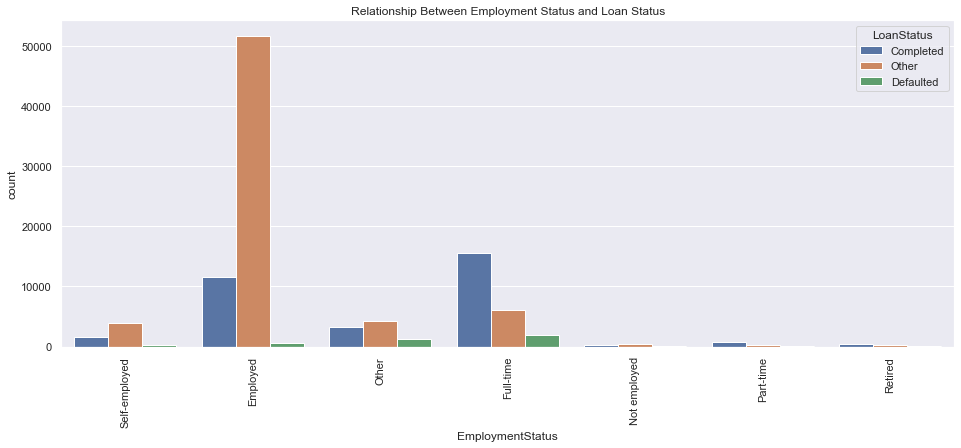

In [36]:
#relationship between EmploymentStatus and LoanStatus
plt.figure(figsize=[16,6])
plt.title('Relationship Between Employment Status and Loan Status')
sns.countplot(data = df, x = 'EmploymentStatus', hue = 'LoanStatus')
plt.xticks(rotation=90);

Most of the completed loan status comes from the Full time workers with the other forms mostly associated with employed applicants

**what is the relationship between Loan term and LoanStatus**

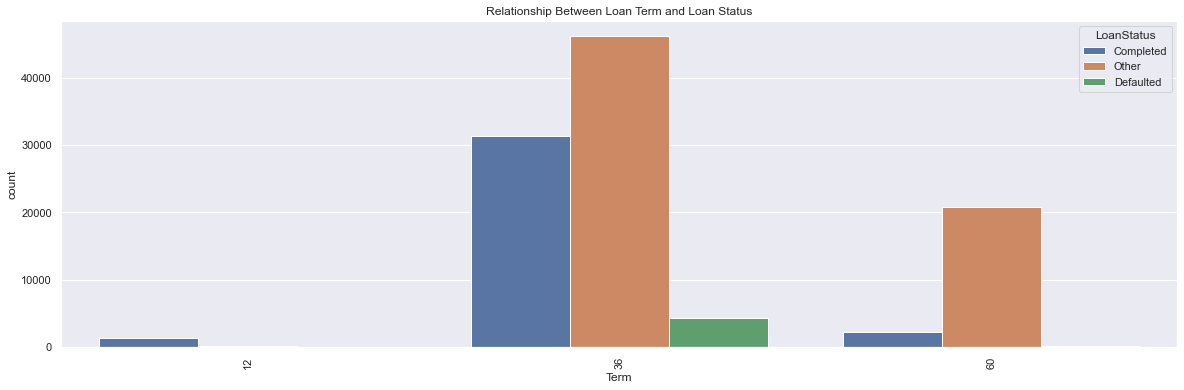

In [37]:

plt.figure(figsize=[20,6])
plt.title('Relationship Between Loan Term and Loan Status')

sns.countplot(data = df, x = 'Term', hue = 'LoanStatus')
plt.xticks(rotation=90);

Almost all applicants with a 1 year term has a completed loan status although they are very few. Looking at the difference beteen completed and other for the the 3 year term and 5 year term, most applicants have a completed loan term for 3 years as compared to that of 5 years

**what is the relationship between employment status and loan status**

In [38]:
# Use group_by() and size() to get the number of loan status and each combination of the two variable as a pandas Series
ct_counts = df.groupby(['LoanStatus',  'EmploymentStatus']).size()

# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have employment status on rows
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', values = 'count')

In [39]:
ct_counts

EmploymentStatus,Employed,Full-time,Not employed,Other,Part-time,Retired,Self-employed
LoanStatus,,,,,,,
Completed,11604,15475,325,3319,730,434,1585
Defaulted,607,1917,23,1183,52,52,179
Other,51631,6143,449,4202,216,262,3880


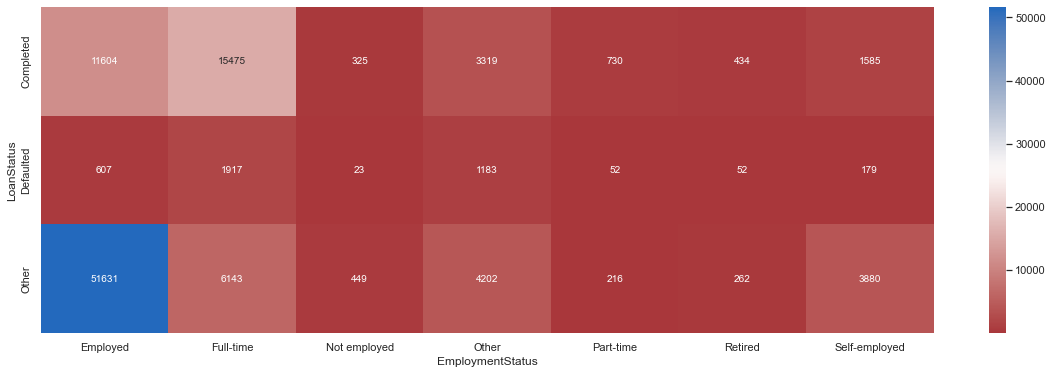

In [40]:
#altenative way of understanding relationship between employment status and loan status 
plt.figure(figsize=[20,6])

sns.heatmap(ct_counts, cmap = 'vlag_r', annot=True, fmt = '.0f');

Majority of full time workers has a completed loan status. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Many of the variables I explored are not strongly correlated. The minimum credit score increased from 600 starting in 2009 to 640 in 2014, credit scores and annual incomes have been increasing over time. Because of the strong correlation between credit scores and yearly salaries, incomes have been rising over time as well.
For a lower ProsperScore, distribution of effective yield is higher than the higher ProsperScores also Prosper score is highly correlated with loan amount. The higher the prosper score, the higher the loan amount.

The median loan amount has been increasing over time. From the graph, It appears that a new minimum loan amount was implemented in 2011 and that the maximum loan amount was increased in 2013 from 25,000 to 35,000 dollars


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, applicants who are employed always have a very high annual income as compared to the others. I always discovered that, For a lower ProsperScore, distribution of effective yield is higher than higher ProsperScores.

**The debt-to-income (DTI) ratio** is the percentage of your gross monthly income that goes to paying your monthly debt payments and is used by lenders to determine your borrowing risk.
- The debt-to-income (DTI) ratio measures the amount of income a person or organization generates in order to service a debt.
- A DTI of 43% is typically the highest ratio a borrower can have and still get qualified for a mortgage, but lenders generally seek ratios of no more than 36%.
- A low DTI ratio indicates sufficient income relative to debt servicing, and it makes a borrower more attractive

## Multivariate Exploration


**What is the Relationship between loan status and employment status with respect to  monthly income**

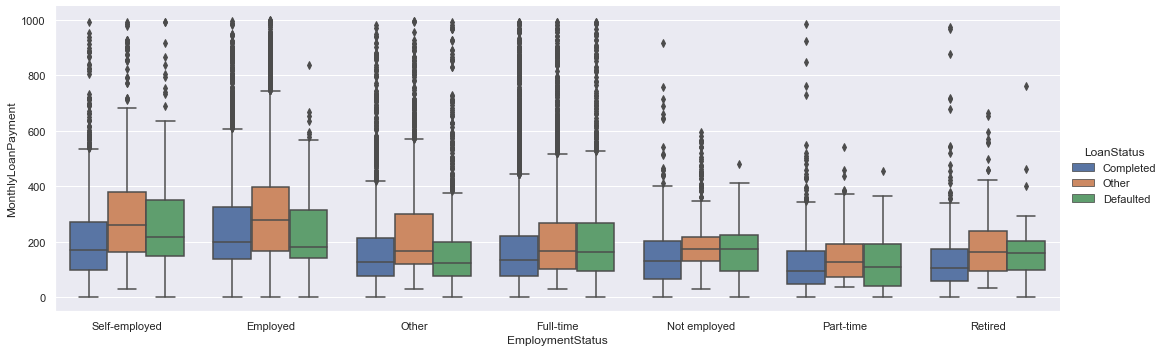

In [41]:
sns.factorplot(data=df, x='EmploymentStatus', y='MonthlyLoanPayment', 
               hue='LoanStatus',  
               kind='box', legend=True, aspect=3)
#plt.figure(figsize=[12,6])


Loan Status for the various employment seems indeffierent with respect to their monthly loan payment. 

**is there a difference in monthly loan payment and monthly Income among employment status**


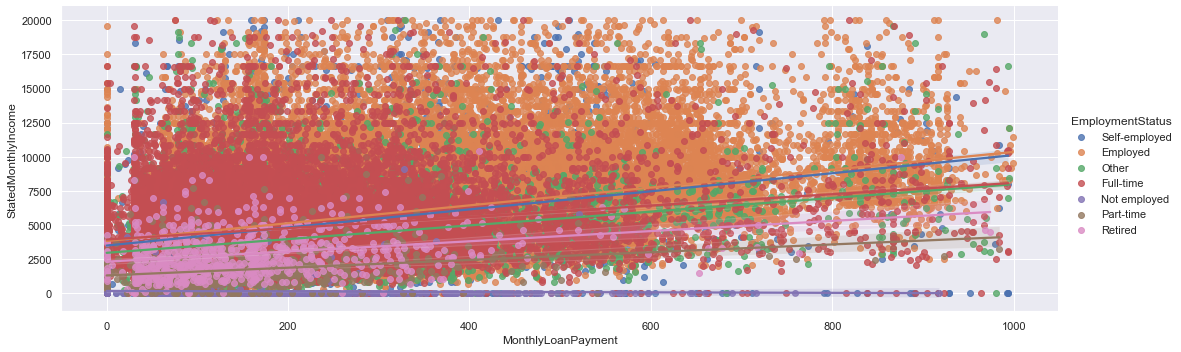

In [42]:
g=sns.lmplot(x="MonthlyLoanPayment",y="StatedMonthlyIncome", hue='EmploymentStatus', data=df, aspect=3)
plt.show()

There is a significant difference among the various employment types with respect to loan payment and monthly income. Applicants who are employed tends to have a high monthly income and a high loan payment. Retired applicants, on the other hand, has a very low income and monthly opayment.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
Here I explored the relationship that the selected quantitative variables has with Loan Amount and Loan status of applicants. 
It was discovered that, I did not discover many insights as expected, most of the variables seems to be uncorrelated with the loan amount with respect to loan status. Howver, there seems to be a high relationship between monthly loan payment and loan amount. The higher the monthly loan payment, the higher amount you get. 


### Were there any interesting or surprising interactions between features?

There was no specific relationship betweeen these variables and the Borrower rate with respect to the loan status of applicants. 


## Conclusions
In this project, I worked on a loan dataset from Prosper loans, a company that are specialized in giving out loans at low interest rates to the borrowers. After the exploratory data analysis:
There was 81 variables in the dataset. It took me some time to decide which ones I would look at, and I went with the ones that would have influences on Loan Amount and loan defaults (satus). 

- Majority of the customers are employed with the least amongs them being retired and unemployed applicants. The comapny has most of her customers coming from California. Also, majority of the customers are Professionals with most applicants having an annual income range between 25000 and 50000 dollars. In terms of terms of loans, 3/4 of the applivcants are on the 36 month term (3 years). Most of the times, no there are no investors funding the applicants loans. Number of loans has been increasing over time with the amount of loan being increased over time
- Loan applicants with a better credit score tends to receive high loan amount. However, loan amount amount starts to decreasesafter credit score of 800
- Part-time workers, Appliacants with current loan status, and applicants with an annual income range between 1 and 25000 dollars has the highest Debt to Income (DTI) ratio with most of the on-time loan payments being the retired and applicants with current loan status. 
- Applicants that are employed have a high monthly income and makes high loan payments as well. Applicants whose laons are due has a very low delinquencies with full time workers having a high loan delinquencies. 
